<h1>Import libraries<h1>

In [1]:
from Diagnostic_tests.Breusch_Godfrey import *
from Diagnostic_tests.Breusch_Pagan import *
from Diagnostic_tests.CHOW import *
from Diagnostic_tests.Jarque_Bera import *
from Diagnostic_tests.RESET import *
from Diagnostic_tests.White import *
from Model.Interactions import *
from Model.Linear_regression_from_scratch import *
from Model.Polynomial import *
from Problems_with_data.Unusual_Outlier_Observations import *
from Problems_with_data.VIF import *
from Metrics.Regression_metrics import *
from Plots.Prediction_plots import *
from Plots.Algorithms_plots import *
from Plots.Preprocessing_plots import *
Plots_predictions = Prediction_plots()
Plots_algorithms = Algorithm_plots()
Plots_preprocessing = Preprocessing_plots()

<h1>Explanation of Linear Regression<h1>

$\text{Linear regression is one of the simplest algorithms used for regression problems.}$
$\text{The equation of the regression model (for the LIN-LIN form), we can describe:}$
$$\mathbf{y_i=\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}+\varepsilon_i,\ for\ i=1,\ldots,N}$$
$\text{Where: } y_i \text{ – dependent variable (endogenous/dependent) for observation } i, \\ x_{1,\ i},\ldots x_{M,\ i} \text{ - (predictors) explanatory variables (exogenous/independent) for observations } i, \\
\beta_0 \text{ – intercept, } y_i \text{ value for predictors equal to } 0,
\beta_j \text{ – parameter corresponding to the amount of change } y_i \text{ when changing by one unit }x_{j,\ i}, \\
\varepsilon \text{ – random error for observations i }(\text{responsible for that part of } y_i \text{ variability that cannot be explained by explanatory variables}).$

$\textbf{The Gauss-Markov theorem } \text{is a set of assumptions about a linear regression model that, when held, will yield least squares.}$
$$\textbf{Gauss-Markov assumptions}$$
$\textbf{1. Linearity} \\\
H_0\text{: Function form is valid (line matches points).} \\\
H_1\text{: The functional form is not correct.} \\~\\
\text{Verification by RESET or Chow test.} \\
\text{Consequences of not meeting the assumption: the estimators are biased and inconsistent, there is no point in inferring from this model.} \\
\text{Attempted repair: removing statistically insignificant variables from the model, taking the logarithm of the dependent variable.} \\~\\$
$\textbf{2. Homoscedasticity} \\~\\
H_0\text{: Residuals have a constant spread (homoscedasticity).} \\
H_1\text{: Residuals do not have a constant spread (heteroscedasticity).} \\~\\
\text{Verification by the Breusch-Pagan test.} \\
\text{Consequences of not meeting the assumption: Estimators can be unbiased and consistent, but inefficient, leading to incorrect statistical inferences.} \\
\text{Attempted repair: removing statistically insignificant variables from the model, taking the logarithm of the dependent variable, or introducing a robust White's variance-covariance matrix.} \\
\text{Thanks to the use of matrices: despite the fact that the random errors are still not homoskedastic, thanks to this procedure the distribution of statistics is asymptotic} \\
\text{(as the sample size increases, the estimators will strive for the correct distribution). This allows you to interpret the results.} \\~\\$
$\textbf{3. Residuals autocorrelation} \\~\\
H_0\text{: No residual autocorrelation.} \\
H_1\text{: Autocorrelation of residuals exists.} \\~\\
\text{Verification by the Breusch-Godfrey test.} \\
\text{Consequences of not meeting the assumption: the same as in the case of homoskedasticity, i.e. incorrect statistical inference.} \\~\\$
$\textbf{4. Non-randomness of explanatory variables} \\~\\
\text{The explanatory variables are non-random, i.e. they are independent of the random component. So the covariance between each variable and the random error is 0.} \\~\\$
$\textbf{5. Expected value of the random component is equal to 0} \\~\\
\text{It most often occurs when the explanatory variable is correlated with the explanatory variable or other explanatory variables.} \\
\text{Consequences of failing to meet the assumption: overestimating or underestimating the estimators.} \\~\\$}

$\text{If the Gauss-Markov assumptions are met, then our estimator has three desirable features:} \\
\text{- The }\hat{\beta} \text{ estimator is unbiased when: } E\left(\hat{\beta}\right)=\beta \\~\\
\text{- An estimator is efficient if it has a small and lowest variance among all estimators. So it has a variance-covariance matrix smaller than some estimator } \beta^\prime: Var\left(\beta\right)<Var\left(\beta^\prime\right) \\~\\
\text{- The estimator is consistent, i.e. converges to true values.} \\~\\
\text{Unbiased, efficient and consistent estimator is called } \textbf{BLUE } \text{(best linear unbiased estimator), which is the best among all linear estimators.} \\~\\
\text{There is also a sixth, additional assumption:} \\~\\
\textbf{6. The normality of the random component} \\~\\
H_0\text{: The residuals are normally distributed } \varepsilon_i~N\left(0,\sigma^2\right). \\
H_1\text{: Residuals are not normally distributed.} \\~\\
\text{Verification by Jarque-Bera test.} \\
\text{Consequences of not meeting the assumption: with a large number of samples - it does not matter, with a small number of samples it means that the test statistics do not have the appropriate distributions.} \\
\text{Even in the absence of this assumption (assuming that all Gauss-Markov assumptions are satisfied), we can still talk about the best linear unbiased estimator. Only better non-linear estimators can exist.}$

$\textbf{The formula for vector estimates of the vector of unknown parameters:}$
$$\bm{\hat{\beta}=\left(X^\prime\times X\right)^{-1}\times X^\prime\times\gamma}$$
$\text{Our goal in linear regression is always to: }\bm{Residual\ sum\ of\ squares=RSS=\sum_{i=1}^{N}\left(y_i-{\hat{y}}_i\right)^2\rightarrow min!} \text{ hence the name OLS (Ordinary Least Squares).}$

<h1>Preprocessing<h1>

<h2>Download data<h2>

In [2]:
data = pd.read_csv("Data/Sales.csv")
print("Number of observations: {}".format(len(data)))
data.rename(columns={"Social Media": "Social_Media"}, inplace=True)
data.head()

Number of observations: 4572


,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


<h2>Check for null data<h2>

In [3]:
data.isnull().sum()/len(data)

TV              0.002187
Radio           0.000875
Social_Media    0.001312
Influencer      0.000000
Sales           0.001312
dtype: float64

<h3>Clean data<h3>

In [4]:
data.dropna(inplace=True)
print("Number of observations: {}".format(len(data)))
data.head()

Number of observations: 4546


,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


<h3>Check dtypes of dataset<h3>

In [5]:
data.dtypes

TV              float64
Radio           float64
Social_Media    float64
Influencer       object
Sales           float64
dtype: object

<h3>Now we should convert our categorical data to numeric<h3>

In [6]:
data["Influencer"].unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [7]:
encoder = OrdinalEncoder()
data["Influencer_transformed"] = encoder.fit_transform(data[["Influencer"]])

<h2>Create X and y variables<h2>

In [8]:
X = data[["TV", "Radio", "Social_Media", "Influencer_transformed"]]
y = data[["Sales"]]

<h3>Now we can check results of the data<h3>

In [9]:
model = Linear_Regression(fit_intercept=True, optimization=False, degree=2)
model.fit(X, y, features_names=X.columns.tolist(), target_name="Sales", robust=False)
y_pred = model.predict(X, features_names=X.columns.tolist())
residuals = y - y_pred
print(model.summary())

                              Linear Regression estimations                               
Dep. Variable Name:                Sales     R-squared:                         0.999
No. Observations:                   4546     R-squared Adjusted:              0.99899
Df Residuals:                       4541     F Statistic:               1128627.93462
Df Model:                              4     Prob(F-statistic):                   0.0
White's robust covariance used:    False
                            coef      std error         t     Prob(t)     [0.025]      [0.975]
----------------------------------------------------------------------------------------------
Intercept                 -0.089          0.119    -0.744       0.457      -0.325        0.147
TV                         3.563          0.003  1051.017         0.0       3.556        3.569
Radio                     -0.004           0.01      -0.4        0.69      -0.023        0.015
Social_Media               0.005          0.025  

$\text{For our model:}$
$$y_i=\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}+\varepsilon_i$$

$\text{We will check diagnostic tests (to verify all Gaussian-Markov assumptions) at significance level: } \alpha = 0.05$

$\text{RESET Test}$
$$y_i=\beta_0+\beta_1\times\ x_{\left(1,i\right)}+\ldots+\beta_M\times\ x_{\left(M,i\right)}+\alpha_1\times\widehat y^2+\alpha_2\times\widehat y^3+\ldots+\alpha_{\left(power-1\right)}\times\widehat y^{power}+\varepsilon_i$$
$H_0:\alpha_1=\alpha_2=\ldots=\alpha_{k-1}\rightarrow \text{functional form is correct (the line matches the points)} \\
H_1:\alpha_i\neq\alpha_j \text{ for } i\neq j\rightarrow \text{functional form is not correct (the line does not match the points)}$
$$F_{TEST}=\frac{\frac{RSS_R-RSS_U}{power-1}}{\frac{RSS_U}{N-M}}\sim F(power-1,N-M)$$
$\text{Where: }RSS_R \text{ - residuals squared for the restricted model,} \\
RSS_U \text{ - residuals squared for the unrestricted model,} \\
power \text{ - value of the last power of the prediction taken for the unconstrained model,} \\
M \text{ - the number of independent variables in the unrestricted model (together with the constant and these predictions),} \\
N \text{ - the number of observations in the set.}$

In [10]:
reset_test = RESET()
reset_test.test(fitted_model=model, power=3)
print("F_Test: {}\np-value: {}".format(reset_test.F_test, reset_test.p_value))

F_Test: 0.87233
p-value: 0.41805


$p-value > \alpha \rightarrow 0.41805 > 0.05 \rightarrow \text{So the functional form of the model is correct.}$

$\text{Chow Test}$
$$Class\ 1:\ y_i=\beta_0^1+\beta_1^1\times x_{1,i}+\beta_2^1\times x_{2,i}+\ldots+\beta_M^1\times x_{M,i}+\varepsilon_i$$
$$Class\ 2:\ y_i=\beta_0^2+\beta_1^2\times x_{1,i}+\beta_2^2\times x_{2,i}+\ldots+\beta_M^2\times x_{M,i}+\varepsilon_i$$
$$\ldots$$
$$Class\ c:\ y_i=\beta_0^c+\beta_1^c\times x_{1,i}+\beta_2^c\times x_{2,i}+\ldots+\beta_M^c\times x_{M,i}+\varepsilon_i$$
$H_0: \text{ parameters in subsamples are stable: } \beta_0^1=\beta_0^2=\ldots=\beta_0^c\land\beta_1^1=\beta_1^2=\ldots=\beta_0^c\land\ldots\ \land\beta_M^1=\beta_M^2=\ldots=\beta_M^c. \\
H_1: \text{parameters in subsamples are not stable: at least one of the coefficients.}$
$$F_{TEST}=\frac{\frac{RSS_R-\sum_{i=1}^{c}{RSS_{U_i}}}{M\times(c-1)}}{\frac{\sum_{i=1}^{c}{RSS_{U_i}}}{N-M\times c}}\sim F((c-1)\times M,N-c\times M)$$
$\text{Where: }RSS_R \text{ - residuals squared for the constrained model,} \\
RSS_{U_i} \text{ - residuals squared for one of the unrestricted models,} \\
c \text{ - number of classes for our variable against which we group,} \\
M \text{ - the number of independent variables in the constrained model (together with a constant),} \\
N \text{ - the number of observations in the set.}$

In [11]:
chow_test = CHOW()
chow_test.test(fitted_model=model, feature="Influencer_transformed", data=data)
print("F_Test: {}\np-value: {}".format(chow_test.F_test, chow_test.p_value))

F_Test: 1.24251
p-value: 0.24684


$p-value > \alpha \rightarrow 0.24684 > 0.05 \rightarrow \text{ So parameters in subsamples are stable.}$

$\text{Breusch-Pagan Test}$
$${\hat{e}}_i^2=\left(y_i-\widehat{y_i}\right)^2$$
$${\hat{e}}_i^2=\alpha_0+\alpha_1\times x_{1,i}+\alpha_2\times x_{2,i}+\ldots+\alpha_M\times x_{M,i}+\delta_i$$
$H_0\text{: The residuals have a constant spread (homoskedasticity): } \alpha_0=\alpha_1=\ldots=\alpha_M=0 \\
H_1: \hat{\mathrm{\Sigma}} \text{ biased and discordant (heteroskedasticity).}$
$$F_{TEST}=\frac{\frac{R^2}{M}}{\frac{1-R^2}{N-M-1}}\sim F(M, N-M-1)$$
$\text{Where: }R^2 \text{ - coefficient of determination for the unrestricted model,} \\
M \text{ - the number of independent variables in the unrestricted model (together with a constant),} \\
N \text{ - the number of observations in the set.}$

In [12]:
breusch_pagan_test = Breusch_Pagan()
breusch_pagan_test.test(fitted_model=model)
print("F_Test: {}\np-value: {}".format(breusch_pagan_test.F_test, breusch_pagan_test.p_value))

F_Test: 0.30704
p-value: 0.90894


$p-value > \alpha \rightarrow 0.90894 > 0.05 \rightarrow \text{ So the residuals have a constant spread (homoskedacity).}$

$\text{White Test} \\~\\
\text{It is simmilar to Breusch-Pagan but we add interactions of independent variables.}$
$${\hat{e}}_i^2=\left(y_i-\widehat{y_i}\right)^2$$
$${\hat{e}}_i^2=\alpha_0+\alpha_1\times x_{1,i}+\alpha_2\times x_{2,i}+\alpha_3\times x_{1,i}\times x_{2,i}+\ldots+\delta_i$$
$H_0\text{: The residuals have a constant spread (homoskedasticity): } \alpha_0=\alpha_1=\ldots=\alpha_M=0 \\
H_1: \hat{\mathrm{\Sigma}} \text{ biased and discordant (heteroskedasticity).}$
$$F_{TEST}=\frac{\frac{R^2}{M}}{\frac{1-R^2}{N-M-1}}\sim F(M,N-M-1)$$
$\text{Where: }R^2 \text{ - coefficient of determination for the unrestricted model,} \\
M \text{ - the number of independent variables in the unrestricted model (together with a constant),} \\
N \text{ - the number of observations in the set.}$

In [13]:
white_test = White()
white_test.test(fitted_model=model)
print("F_Test: {}\np-value: {}".format(white_test.F_test, white_test.p_value))

F_Test: 0.4248
p-value: 0.9727


$p-value > \alpha \rightarrow 0.9727 > 0.05 \rightarrow \text{ So the residuals have a constant spread (homoskedacity).}$

$\text{If tests indicated that there is heteroskedasticity in the model then we would use White's robust variance-covariance matrix.} \\
\text{This will not eliminate heteroskedasticity, but the distribution of our estimator will, for a large sample, tend toward the true distribution:}$
$$\hat{V}\left(\hat{\beta}\right){\xrightarrow{n}}V\left(\beta\right)$$
$\text{The formula for White's variance-covariance matrix is as follows:}$
$$\hat{V}\left(\hat{\beta}\right)=\left(\sum_{i=0}^{N}{x_i^T\times x_i}\right)^{-1}\times\left(\sum_{i=0}^{N}{x_i^T\times x_i\times e_i^2}\right)\times\left(\sum_{i=0}^{N}{x_i^T\times x_i}\right)^{-1}$$
$\text{Thus, if we assume the denotations:}$
$$X=\left[\begin{matrix}x_{1,0}&x_{2,0}&\ldots&x_{M,0}\\x_{1,1}&x_{2,1}&\ldots&x_{M,1}\\\ldots&\ldots&\ldots&\ldots\\x_{1,N}&x_{2,N}&\ldots&x_{M, N}\\\end{matrix}\right],\ D=\left[\begin{matrix}e_0^2&0&\ldots&0\\0&e_1^2&\ldots&0\\\ldots&\ldots&\ldots&\ldots\\0&0&\ldots&e_N^2\\\end{matrix}\right]$$
$\text{Then:}$
$$\hat{V}\left(\hat{\beta}\right)=\left(X^\prime\times X\right)^{-1}\times\left(X^\prime\times D\times X\right)\times\left(X^\prime\times X\right)^{-1}$$

$\text{Plot for homoskedacity}$

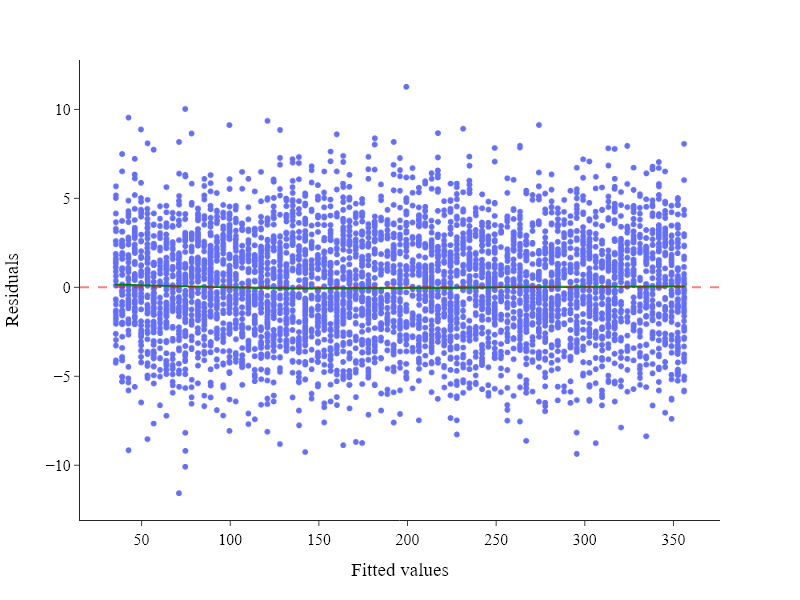

In [14]:
Plots_algorithms.homoscedacity_plot(y_true=y, y_pred=model.predict(X, features_names=X.columns.tolist()))

$\text{On the above graph we can clearly see that there is homoskedacity in our model. The spread of residuals is constant.} \\~\\
\text{Also based on the graph we can verify another assumption of Gaussian Markov theorem: expected value of error is equal to 0:}$
$$\varepsilon_i=0$$

$\text{Breusch-Godfrey Test}$

$${\hat{e}}_i=y_i-\widehat{y_i}$$
$${\hat{e}}_i=\alpha_0+\alpha_1\times x_{1,i}+\alpha_2\times x_{2,i}+\ldots+\alpha_M\times x_{M,i}+\rho_1\times e_{i-1}+\ldots+\rho_l\times e_{i-l}+\delta_i$$
$\text{Where: }l \text{ - the number of delays defined by the user.} \\~\\
H_0 \text{: No autocorrelation of residuals: } \rho_1=\rho_2=\ldots=\rho_l=0 \\
H_1\text{: Autocorrelation of residuals exists: } \rho_i=\rho_j$
$$F_{TEST}=\frac{\frac{R^2}{l}}{\frac{1-R^2}{N-l-M-1}}\sim F(l, N-l-M)$$
$\text{Where: } R^2\text{ - the coefficient of determination for the constrained model,} \\
l\text{ - the number of lags defined by the user,} \\
M\text{ - the number of independent variables in the constrained model (together with a constant),} \\
N\text{ - the number of observations in the set.}$

In [15]:
breusch_godfrey_test = Breusch_Godfrey()
breusch_godfrey_test.test(fitted_model=model, nlags=None)
print("F_Test: {}\np-value: {}".format(breusch_godfrey_test.F_test, breusch_godfrey_test.p_value))

F_Test: 0.0
p-value: 1.0


$p-value > \alpha \rightarrow 1 > 0.05 \rightarrow \text{autocorrelation of residuals does not exist.}$

$\text{Jarque-Bera Test}$

$${\hat{e}}_i=y_i-\widehat{y_i}\rightarrow\hat{e}=\left[\begin{matrix}{\hat{e}}_1\\{\hat{e}}_2\\\ldots\\{\hat{e}}_n\\\end{matrix}\right]$$
$H_0\text{: The residuals have a normal distribution } \varepsilon_i\sim N(0,\sigma^2). \\
H_1\text{: The residuals do not have a normal distribution.}$
$$\text{Skewness: } S=\frac{{\hat{\mu}}_3}{{\hat{\sigma}}_3}=\frac{\frac{1}{N}\times\sum_{i=1}^{N}\left({\hat{e}}_i-\bar{\hat{e}}\right)^3}{\left(\frac{1}{N}\times\sum_{i=1}^{N}\left({\hat{e}}_i-\bar{\hat{e}}\right)^2\right)^\frac{3}{2}}$$
$$\text{Kurtosis: } K=\frac{{\hat{\mu}}_4}{{\hat{\sigma}}_4}=\frac{\frac{1}{N}\times\sum_{i=1}^{N}\left({\hat{e}}_i-\bar{\hat{e}}\right)^4}{\left(\frac{1}{N}\times\sum_{i=1}^{N}\left({\hat{e}}_i-\bar{\hat{e}}\right)^2\right)^2}$$
$$JB=\frac{N}{6}\times\left(S^2+\frac{1}{4}\times\left(K-3\right)^2\right)\sim \chi(2)$$

In [16]:
jarque_bera_test = Jarque_Bera()
jarque_bera_test.test(fitted_model=model)
print("F_Test: {}\np-value: {}".format(jarque_bera_test.Jarque_Bera_Statistic, jarque_bera_test.p_value))

F_Test: 0.04245
p-value: 0.979


$p-value > \alpha \rightarrow 0.979 > 0.05 \rightarrow \text{ So residuals have the normal distribution.}$

<h3>Check it on graphs<h3>

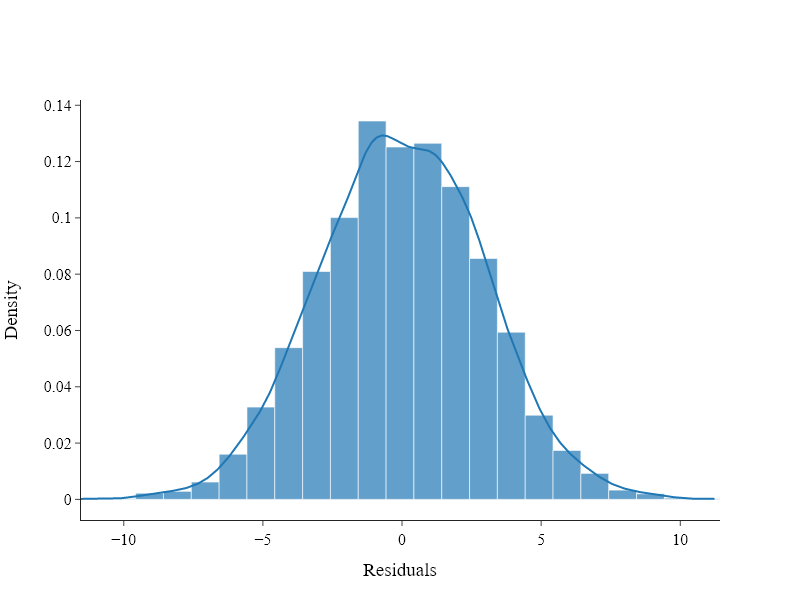

In [17]:
Plots_preprocessing.hist_plot_with_kde(data=residuals, xaxis_title="Residuals")

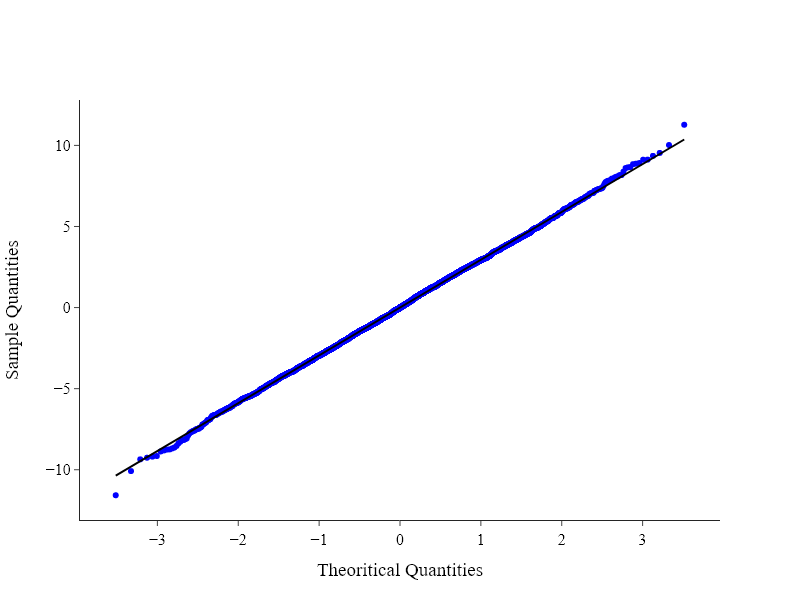

In [18]:
Plots_algorithms.quantile_plot(data=residuals)

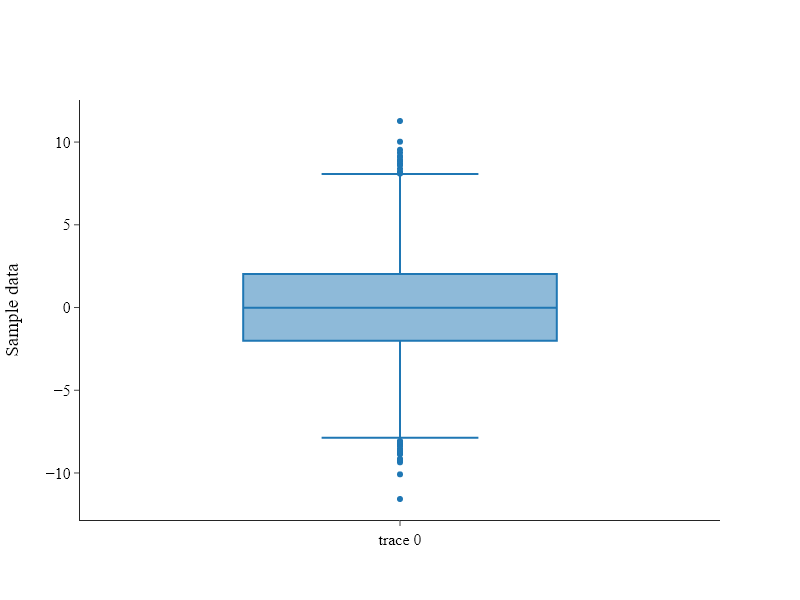

In [19]:
Plots_preprocessing.boxplot(data=residuals)

<h3>Plot predictions vs real values<h3>

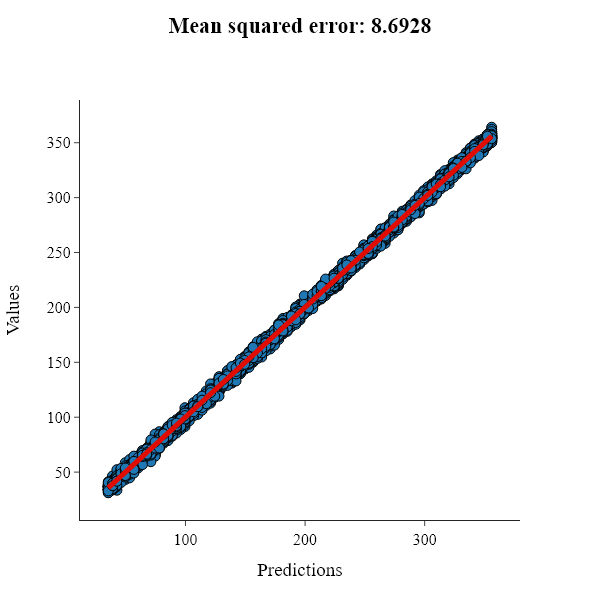

In [20]:
Plots_algorithms.plot_linear_regression(y_true=y, y_pred=model.predict(X, features_names=X.columns.tolist()), metric="RMSE")

<h3>Check if there are any problems with data<h3>

$\text{Correlation between variables: VIF statistic}$

$$x_{1,i}=\alpha_0+\alpha_2\times x_{2,i}+\ldots+\alpha_M\times x_{M,i}+u_i\\ 
x_{2,i}=\alpha_0+\alpha_1\times x_{1,i}+\ldots+\alpha_M\times x_{M,i}+u_i\\
\ldots\\
x_{M,i}=\alpha_0+\alpha_1\times x_{1,i}+\ldots+\alpha_M\times x_{M-1,i}+u_i\\
VIF_{x_i}=\frac{1}{1-R_{x_i}^2}\\$$
$\text{We might remove feature }x_i\text{ if: } VIF_{x_i}>10 $


In [21]:
vif_statistic = VIF()
vif_statistic.test(fitted_model=model)
vif_statistic.scores

,VIF,Tolerance
TV,4.0892,0.2445
Radio,4.6660,0.2143
Social_Media,1.5819,0.6322
Influencer_transformed,1.0005,0.9995
Average,2.8344,0.5226


$\text{Based on VIF statistic we should not remove any feature}$

<h3>Outliers<h3>

$$\text{Leverage }= h_i=diagonal\left(h_{ii}\right)$$
$\text{Where: } h_{ii}=x_i^\prime\times\left(X^\prime\times X\right)^{-1}\times x_i$
$$\text{Standarized residuals }= r_i=\frac{e_i}{\sqrt{Var\left(e_i\right)\times{(1-h}_i)}}$$
$\text{Where: } Var\left(e_i\right)=\frac{1}{N-M}\times\sum_{i=0}^{N}{\hat{e}}_i$
$$\text{Cook's distance }= {CD}_i=\frac{r_i^2}{M}\times\frac{h_i}{1-h_i}$$

In [22]:
outliers = Unusual_outlier_observations()
outliers.test(fitted_model=model)
outliers.summary_dataframe

,Leverage,Standarized_residuals,Cook_Distance
0,0.000841,-0.724989,0.000088
1,0.000999,0.172199,0.000006
2,0.000359,1.451114,0.000151
3,0.000864,0.935383,0.000151
4,0.000851,1.129166,0.000217
...,...,...,...
4541,0.000758,0.753159,0.000086
4542,0.001409,-1.225415,0.000424
4543,0.000697,2.400959,0.000805
4544,0.001192,0.277437,0.000018


$\text{If observation meet ALL of below assumptions then it is worth to take a look at it:} \\$
$\text{- Leverage: } h_i>2\times\frac{M}{N} \\
\text{- Standarized residuals: } \left|r_i\right|>2 \\
\text{- Cook's distance: } {CD}_i>\frac{4}{N}$

$\text{Find these observations}$

In [23]:
outliers.indices_of_outliers

[124, 866, 1883, 2598, 2671, 3052, 3276, 3915, 4166]

<h3>Influence plot<h3>

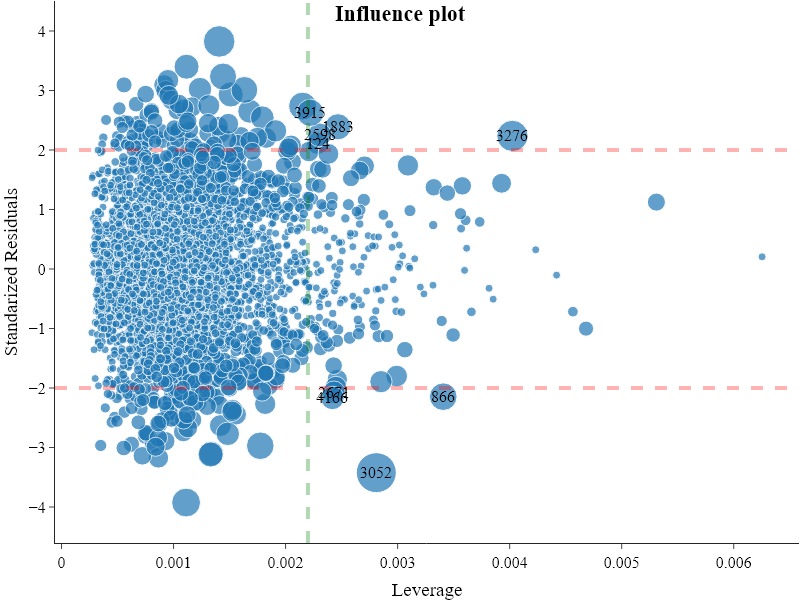

In [24]:
Plots_algorithms.influence_plot(X=model.X, outliers=outliers)

<h3>Correlation plot<h3>

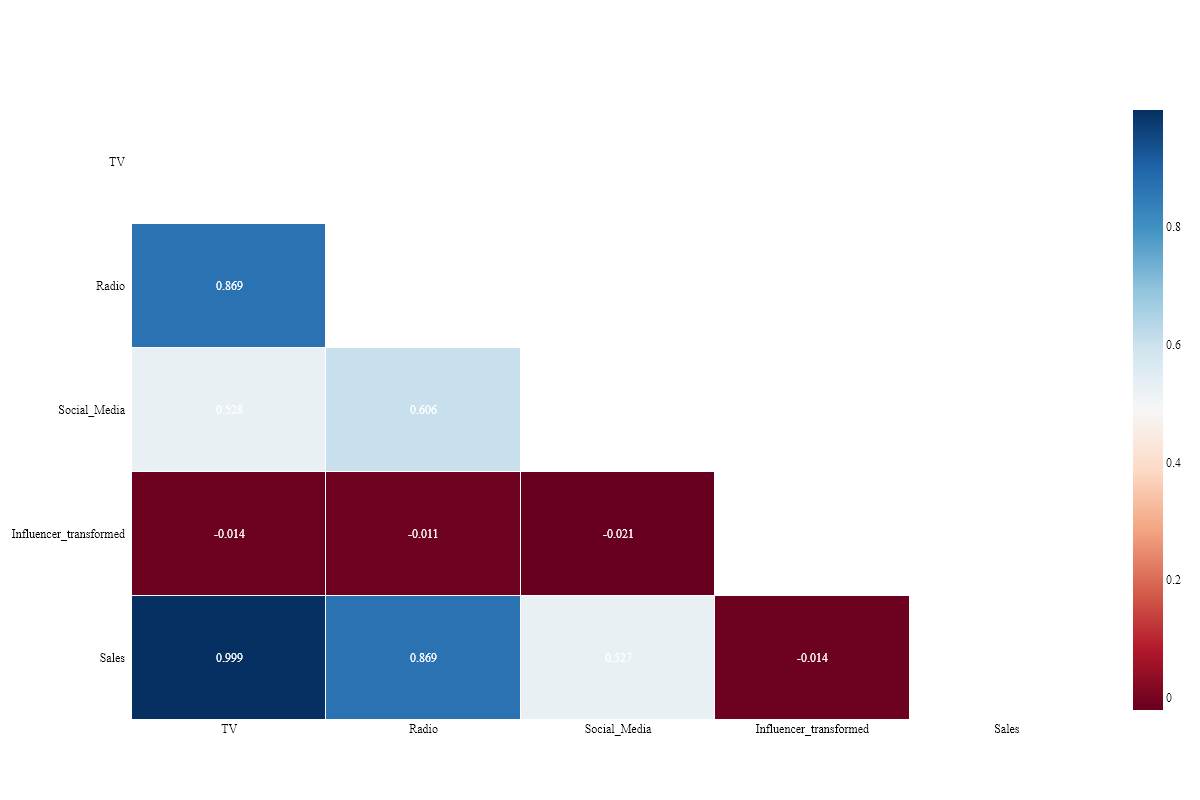

In [25]:
df = np.concatenate([model.X, model.y], axis=1)
features_names = model.features_names + [model.target_name]
if(model.fit_intercept==True):
    df = np.delete(df, 0, axis=1)
    features_names.remove("Intercept")
Plots_preprocessing.correlation_plot(df=df, features_names=features_names)

$\text{Advantages of Linear Regression:} \\
\text{- Ease of implementation and interpretation of the results obtained,}\\
\text{- It is able to generalize the results not badly with a large number of outliers,} \\
\text{- Short compilation time.}$

$\text{Disadvantages of Linear Regression:} \\
\text{- Poor predictive power of the model (we will know the general pattern, but it is hard to predict something based on this),} \\ 
\text{- Assumption of linearity between dependent variable and independent variables.}$